<a href="https://colab.research.google.com/github/farzana74/Assesment_2_Thursday_9AM_group-01/blob/main/Development_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Overview**

The database covers energy usage details from 2008-09 to 2021-22. We used Python to create graphs to show energy consumption trends. For this, we used the 'SQLite3' library to extract the data from databse,  'pandas' library to manage and analyze the data and ‘matplotlib’ library to create the graphs. We loaded the data for different fuel types (coal, oil, gas, and renewables) into a DataFrame and made line graphs to show the trends over the years. This notebook shows how Python can be used to make clear and attractive data visualizations.

##**Algorithm/Pseudocode into Python Code Development**

### **Environment Setup**

To analyze the dataset in this notebook, 3 essential libraries have been imported, each serving a specific function-

1. The **‘SQLite3’** library is utilized to extract data from the database, ensuring efficient data retrieval and management.

2. The **‘pandas’** library is employed as a powerful tool for data analysis, enabling the manipulation and organization of large datasets with ease.

3. The **‘matplotlib’** library is used to plot graphs for data visualization, allowing for clear and insightful representation of the energy consumption trends across different fuel types, years, and states.

These libraries together create a solid environment for conducting the detailed analysis required for this Notebook.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

**Access and Connect The Database**

After accessing and connecting ‘Aus_energy_sqlite3’ to the database using the SQLite3 library in Python, we establish a connection to the database using the ‘sqlite3.connect ('Aus_energy_sqlite3.db')’ function. This function takes the path to the database file as an argument and creates a connection object. Once connected, we create a cursor object with ‘connection.cursor()’. The cursor object is essential for executing SQL commands and queries.

In [ ]:
conn = sqlite3.connect('AUS_energy_sqlite3.db')
cursor = conn.cursor()

### **Data Exploration**

Data exploration involves examining the dataset to understand its structure, identify patterns, and detect anomalies. This process helps ensure the data is ready for analysis or visualization. Data Exploration includes:
1. Viewing the Database: Load the dataset to see its contents.

2. Viewing the Data Structure: Check the data types and identify any missing values.

3. Discovering Inappropriate Data: Look for missing values, duplicates, or inconsistent data.

4. Data Cleansing:  Fill in missing values, and correct any data type issues.

5. Create a New DataFrame: Make a new dataset with the cleaned data or the specific columns you need for analysis.


### **Data Load**

To load the data from the connected Aus_energy_sqlite3 database, we used an SQL query to retrieve information about the table structure. By executing the query PRAGMA table_info('AUS_energy') with the cursor object, we have fetched metadata about the columns in the AUS_energy table.

In [ ]:
sql = '''
PRAGMA table_info('AUS_energy')
'''

cursor.execute(sql)
cursor.fetchall()

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

After successfully loading the data, we proceed to examine the data structure in the table.The retrieved data provides detailed information about each column, including names, data types, and constraints. This allows to understand the layout and structure of the AUS_energy table, which is essential for effective data analysis and manipulation.

In [ ]:
sql = '''
SELECT *
FROM AUS_energy;
'''
AUS_energy_df = pd.read_sql_query(sql,conn)
print(AUS_energy_df)

       Year State Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA     132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW     800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC     695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD     629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA      80.2     120.2     134.0             21.2     1608902   
..      ...   ...       ...       ...       ...              ...         ...   
93  2021-22   VIC     410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD     485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA      25.9     141.6      80.2             48.3     1821200   
96  2021-22   TAS       8.8      39.9       7.1             48.1      571013   
97  2021-22    NT                37.6     110.6              1.6      250219   

    GSP ($ million)  
0            2446

### **Data Extraction**

We are using pandas to get detailed information regarding the table. The DataFrame's info ()  method provides a concise summary of the DataFrame, including the number of entries, column names, data types, and memory usage, giving a comprehensive overview of the table's data structure.This code connects to the database, loads the AUS_energy table into a DataFrame, and then provides a summary of the table's structure and contents using pandas.









In [ ]:
print(AUS_energy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB
None


To check if there is any missing value and zero value



In [ ]:
AUS_energy_df.isnull().sum()

Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64

In [ ]:
(AUS_energy_df == 0).sum()

Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64

### **Data Cleansing**

From the dataset given, 'Population' column is not relevant to our report. Therefore, we decided to remove that column by excluding irrelevant variables like 'Population,' we can enhance the clarity and precision of our findings, which enables a more focused and insightful exploration of the energy consumption across different states and fuel types in Australia.

In [ ]:
data = """
SELECT * FROM AUS_energy
"""

newdf = AUS_energy_df.drop('Population', axis=1)
newdf

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,100174
...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,36701


During the process of generating a new dataframe, it was observed that certain entries in the 'Coal (PJ)' column were blank or missing. According to Tamboli (2024), two approaches to handle missing value are deletion and imputation. Since missing data were minimal, we adapated deletion option. However, deletion could potentially disrupt the analysis, particularly when reading other data from the same row. Therefore, a decision was made to address this issue by replacing the missing values with "0".

In [ ]:
#To clean up the by replace blank fill with '0'

newdf['Coal (PJ)'] = newdf['Coal (PJ)'].replace('',0)
newdf['Oil (PJ)'] = newdf['Oil (PJ)'].replace('',0)
newdf['Gas (PJ)'] = newdf['Gas (PJ)'].replace('',0)
newdf['Renewables (PJ)'] = newdf['Renewables (PJ)'].replace('',0)
newdf

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,100174
...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,36701


### **Data Analysis**

#### Group A, Q:2 Computing and visualizing the total energy consumption by fuel type


To initiate the analysis, the first step involves defining a list of the four identified fuel types: Coal, Oil, Gas, and Renewables. Then, we sum up the total consumption for each of these fuel types over the period from 2008 to 2022.

For this, we performed a very basic bar graph based on the code we learned in our lab lesson without referring to any other sources.

In [ ]:
#Define the list of fuel type to filter the dataframe
fuel_type = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']

#Filter the DataFrame to include only the columns with fuel types in the list
filtered_df = newdf[fuel_type]

#Display the filtered DataFrame
print(filtered_df)

    Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
0       132.9     294.3     474.7             15.6
1       800.9     587.5     131.6             54.7
2       695.3     432.9     273.5             33.6
3       629.2     469.5     187.9             77.4
4        80.2     120.2     134.0             21.2
..        ...       ...       ...              ...
93      410.7     410.0     237.5            105.2
94      485.6     504.7     305.7            143.0
95       25.9     141.6      80.2             48.3
96        8.8      39.9       7.1             48.1
97        0.0      37.6     110.6              1.6

[98 rows x 4 columns]


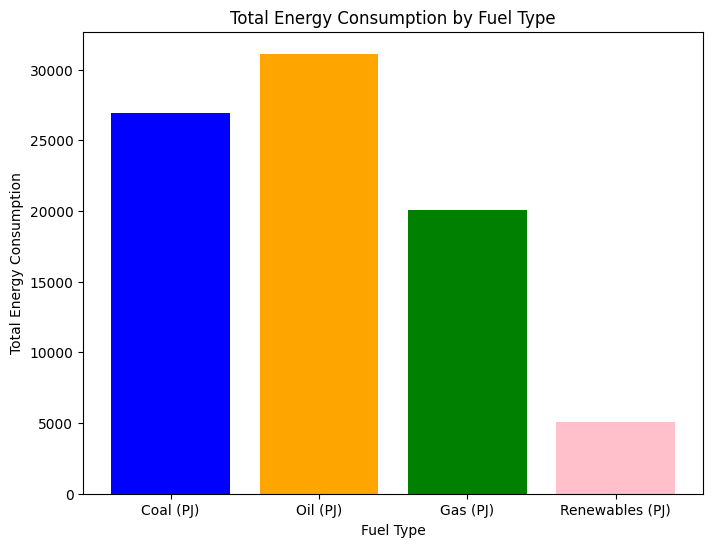

In [ ]:
#Calculating the sum of energy consumption for each fuel type
coal_sum = filtered_df['Coal (PJ)'].sum()
oil_sum = filtered_df['Oil (PJ)'].sum()
gas_sum = filtered_df['Gas (PJ)'].sum()
renewables_sum = filtered_df['Renewables (PJ)'].sum()

energy_consumption = [fuel_sums[fuel] for fuel in fuel_type]

plt.figure(figsize=(8, 6))
bars = plt.bar(fuel_type, energy_consumption, color=['blue', 'orange', 'green','pink'])
plt.title('Total Energy Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Total Energy Consumption')

#To plot bar chart of 'Total Energy by Fuel Type'
plt.show()

#### Group A, Q:3 Analyse and plot the energy consumption fuel types for each year

Firstly, we group each of the fuel type by year. There are two variables in the analysis, year and fuel type.The analysis focuses on plotting these grouped data to visualize the energy consumption trends over time.

Source: https://matplotlib.org/stable/users/explain/text/annotations.html

To facilitate users in reading the data, we develop a code to annotate each data point with its corresponding value, referring to link above. However, we found that this code is not really partical as it replicates the same code with different fuel types again and again.

In [ ]:
element = ['Year','Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']

# Filter the DataFrame to include only the columns with fuel types in the list
filtered_df = newdf[element]
yearly_df = filtered_df.groupby('Year').sum()

# Display the filtered DataFrame
print(yearly_df)

         Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
Year                                                   
2008-09     2350.9    2000.8    1252.8            240.0
2009-10     2224.8    2058.1    1258.0            282.7
2010-11     2123.9    2212.0    1274.2            294.7
2011-12     2074.7    2184.2    1338.6            293.8
2012-13     1930.9    2278.0    1376.5            333.5
2013-14     1845.8    2297.2    1383.8            344.4
2014-15     1907.2    2236.7    1407.0            347.6
2015-16     1954.8    2279.5    1440.3            360.2
2016-17     1930.1    2318.0    1477.7            379.1
2017-18     1847.3    2404.0    1534.5            382.5
2018-19     1801.7    2424.5    1561.9            400.3
2019-20     1706.7    2251.5    1623.8            418.7
2020-21     1661.4    2082.0    1561.0            464.6
2021-22     1586.7    2103.5    1559.5            512.8


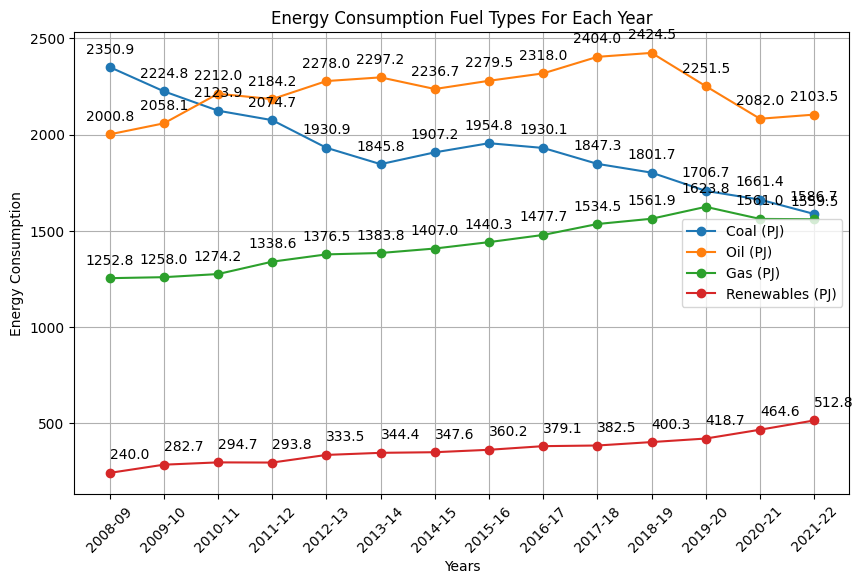

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(year, coal, marker='o', label='Coal (PJ)')
plt.plot(year, oil, marker='o', label='Oil (PJ)')
plt.plot(year, gas, marker='o', label='Gas (PJ)')
plt.plot(year, renewables, marker='o', label='Renewables (PJ)')
plt.title('Energy Consumption Fuel Types For Each Year')
plt.xlabel('Years')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

#Annotate each data point with its corresponding value
for i, (x, y) in enumerate(zip(year, coal)):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

for i, (x, y) in enumerate(zip(year, oil)):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

for i, (x, y) in enumerate(zip(year, gas)):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

for i, (x, y) in enumerate(zip(year, renewables)):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0, 10))

#To plot bar chart of 'Energy Consumption Fuel Types For Each Year'
plt.show()

#### Group B, Q:5 Analysing and visualising the total energy consumption for each state, broken down by fuel type.

The mechanism involves filtering the energy consumption data based on both states and fuel types. This process starts by segregating the dataset into subsets corresponding to each state. Within each state subset, further filtering is applied to isolate the data specific to each fuel type.The total energy consumption for each state is calculated by summing up the consumption values across all fuel types within that state. Finally, these values are visualized using appropriate graphs or charts to provide a clear breakdown of energy consumption patterns for each state, categorized by fuel type.

Source: ChatGPT https://chatgpt.com/

In setup this coding, we received a copy warning message. Therefore we asked ChatGPT how to remove it. ChatGPT suggested to use the .loc method instead of directly assigning values to a slice of the DataFrame by using this code: df.loc[row_label, column_label]

In [ ]:
element1 = ['State','Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']

# Filter the DataFrame to include only the columns with fuel types in the list
filtered_df = newdf[element1]

# Display the filtered DataFrame
print(filtered_df)

   State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
0     WA      132.9     294.3     474.7             15.6
1    NSW      800.9     587.5     131.6             54.7
2    VIC      695.3     432.9     273.5             33.6
3    QLD      629.2     469.5     187.9             77.4
4     SA       80.2     120.2     134.0             21.2
..   ...        ...       ...       ...              ...
93   VIC      410.7     410.0     237.5            105.2
94   QLD      485.6     504.7     305.7            143.0
95    SA       25.9     141.6      80.2             48.3
96   TAS        8.8      39.9       7.1             48.1
97    NT        0.0      37.6     110.6              1.6

[98 rows x 5 columns]


In [ ]:
# Create a new column for total energy consumption
filtered_df['Total_Energy_PJ'] = filtered_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum(axis=1)

# Group the DataFrame by 'State' and sum energy consumption columns, then reset index
grouped_by_state = filtered_df.groupby('State')[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)', 'Total_Energy_PJ']].sum().reset_index()

# Display the grouped DataFrame
print(grouped_by_state)

  State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Total_Energy_PJ
0   NSW     9076.7    8902.4    2071.5           1148.4          21199.0
1    NT        0.0     628.7     862.0             11.6           1502.3
2   QLD     7259.9    7338.6    3747.1           1633.6          19979.2
3    SA      651.7    1857.7    1549.7            448.3           4507.4
4   TAS      143.3     545.7     167.8            618.2           1475.0
5   VIC     8007.5    6580.6    3608.3            865.1          19061.5
6    WA     1807.8    5276.3    8043.2            329.7          15457.0


<ipython-input-57-0c0e15c776b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total_Energy_PJ'] = filtered_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum(axis=1)


In [ ]:
# Create a new column for total energy consumption
filtered_df.loc[:,'Total_Energy_PJ'] = filtered_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum(axis=1)

# Group the DataFrame by 'State' and sum energy consumption columns, then reset index
grouped_by_state = filtered_df.groupby('State')[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)', 'Total_Energy_PJ']].sum().reset_index()

# Display the grouped DataFrame
print(grouped_by_state)

  State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Total_Energy_PJ
0   NSW     9076.7    8902.4    2071.5           1148.4          21199.0
1    NT        0.0     628.7     862.0             11.6           1502.3
2   QLD     7259.9    7338.6    3747.1           1633.6          19979.2
3    SA      651.7    1857.7    1549.7            448.3           4507.4
4   TAS      143.3     545.7     167.8            618.2           1475.0
5   VIC     8007.5    6580.6    3608.3            865.1          19061.5
6    WA     1807.8    5276.3    8043.2            329.7          15457.0


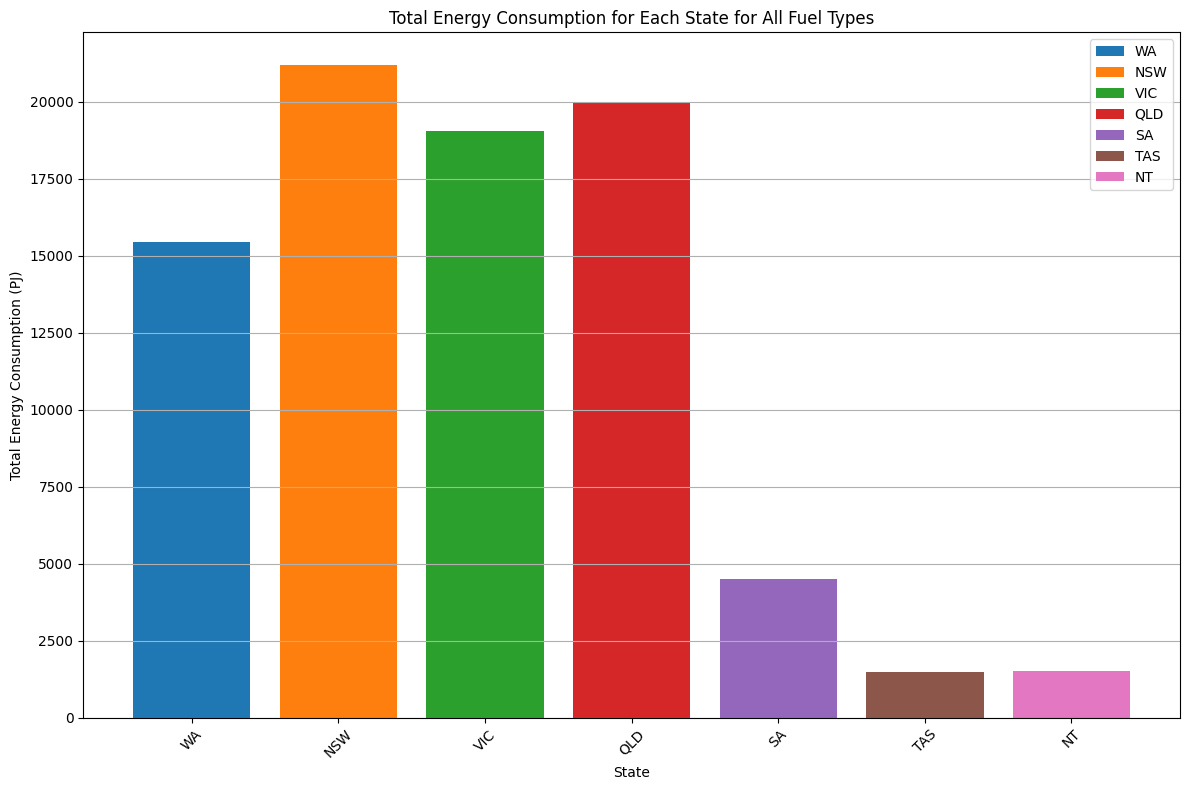

In [ ]:
FuelType = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']
state = ['NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']

plt.figure(figsize=(12, 8))
for state in newdf['State'].unique():
    plt.bar(state, grouped_by_state[grouped_by_state['State'] == state]['Total_Energy_PJ'], label=state)

plt.title('Total Energy Consumption for Each State for All Fuel Types')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Group C, Q:8 Analysis the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures

The mechanism involves calculating the energy intensity for each state annually, defined as the energy consumption per unit of Gross State Product (GSP). This calculation is performed by dividing the total energy consumption (measured in petajoules, PJ) by the corresponding GSP value (measured in millions of dollars) for each state and year. The data is visualized in line graph which represents the amount of energy consumed per unit of output.

Source: https://www.youtube.com/watch?v=NBYzSaTbodM

Here, we wish to improve our code to annotate each data point with its corresponding value. Hence, we watched YouTube tutorials. After developed this improved code, we will need not to perform the repetitive actions as demonstrated in Group A, Q:3.

In [ ]:
element2 = [ 'Year','State','Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)', 'GSP ($ million)']

# Filter the DataFrame to include only the columns with fuel types in the list
filtered_df = newdf[element2]

# Display the filtered DataFrame
print(filtered_df)

       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  \
0   2008-09    WA      132.9     294.3     474.7             15.6   
1   2008-09   NSW      800.9     587.5     131.6             54.7   
2   2008-09   VIC      695.3     432.9     273.5             33.6   
3   2008-09   QLD      629.2     469.5     187.9             77.4   
4   2008-09    SA       80.2     120.2     134.0             21.2   
..      ...   ...        ...       ...       ...              ...   
93  2021-22   VIC      410.7     410.0     237.5            105.2   
94  2021-22   QLD      485.6     504.7     305.7            143.0   
95  2021-22    SA       25.9     141.6      80.2             48.3   
96  2021-22   TAS        8.8      39.9       7.1             48.1   
97  2021-22    NT        0.0      37.6     110.6              1.6   

    GSP ($ million)  
0            244695  
1            530532  
2            368579  
3            284526  
4            100174  
..              ...  
93           5009

In [ ]:
#Calculate the total energy consumption in petajoules (PJ) by summing up the energy consumption
filtered_df['Total_Energy_PJ'] = filtered_df['Coal (PJ)'] +filtered_df['Oil (PJ)'] + filtered_df['Gas (PJ)'] + filtered_df['Renewables (PJ)']

#Convert total energy consumption to GJ
filtered_df['Total_Energy_GJ'] = filtered_df['Total_Energy_PJ'] * 1_000

#Calculate energy intensity in GJ per $ million of GSP
filtered_df['Energy_Intensity'] = filtered_df['Total_Energy_GJ'] / filtered_df['GSP ($ million)']
print(filtered_df)

       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  \
0   2008-09    WA      132.9     294.3     474.7             15.6   
1   2008-09   NSW      800.9     587.5     131.6             54.7   
2   2008-09   VIC      695.3     432.9     273.5             33.6   
3   2008-09   QLD      629.2     469.5     187.9             77.4   
4   2008-09    SA       80.2     120.2     134.0             21.2   
..      ...   ...        ...       ...       ...              ...   
93  2021-22   VIC      410.7     410.0     237.5            105.2   
94  2021-22   QLD      485.6     504.7     305.7            143.0   
95  2021-22    SA       25.9     141.6      80.2             48.3   
96  2021-22   TAS        8.8      39.9       7.1             48.1   
97  2021-22    NT        0.0      37.6     110.6              1.6   

    GSP ($ million)  Total_Energy_PJ  Total_Energy_GJ  Energy_Intensity  
0            244695            917.5         917500.0          3.749566  
1            530532    

In [ ]:
grouped_by_state_year = filtered_df.groupby(['State', 'Year']).mean()
print(grouped_by_state_year)

               Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  \
State Year                                                      
NSW   2008-09      800.9     587.5     131.6             54.7   
      2009-10      771.8     638.9     148.7             63.8   
      2010-11      732.2     685.0     146.5             68.6   
      2011-12      692.7     687.4     142.1             71.1   
      2012-13      643.0     677.4     157.4             70.9   
...                  ...       ...       ...              ...   
WA    2017-18      136.2     405.2     643.3             25.0   
      2018-19      126.8     439.4     667.8             27.3   
      2019-20      119.5     423.6     692.6             29.1   
      2020-21      114.3     418.6     670.2             35.9   
      2021-22      121.1     422.5     673.1             41.2   

               GSP ($ million)  Total_Energy_PJ  Total_Energy_GJ  \
State Year                                                         
NSW   2008-09     

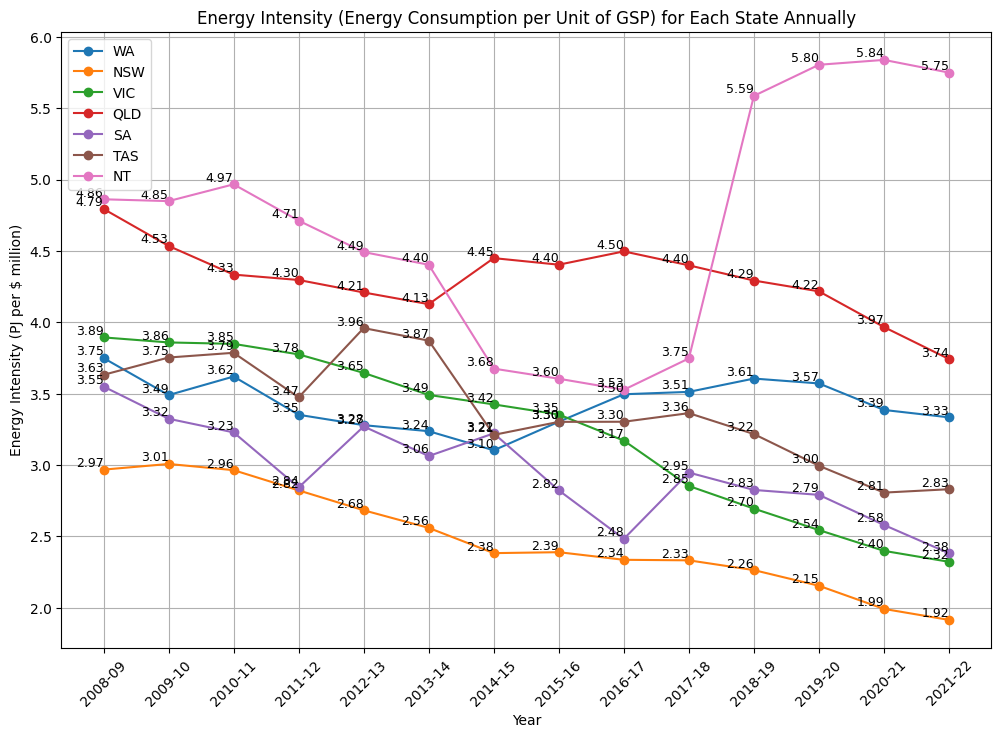

In [ ]:
plt.figure(figsize=(12, 8))
for state in filtered_df['State'].unique():
    state_data = filtered_df[filtered_df['State'] == state]
    plt.plot(state_data['Year'], state_data['Energy_Intensity'], marker='o', label=state)
    for x, y in zip(state_data['Year'], state_data['Energy_Intensity']):
        plt.text(x, y, f'{y:.2f}', ha='right', va='bottom', fontsize=9)


plt.title('Energy Intensity (Energy Consumption per Unit of GSP) for Each State Annually')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (PJ per $ million)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

However, the code above provides a summary view of all filtered data. We then developed the "add a form" function for better data visualization. With this, users can pick exactly what data they want to see, making it easier to understand and work with.

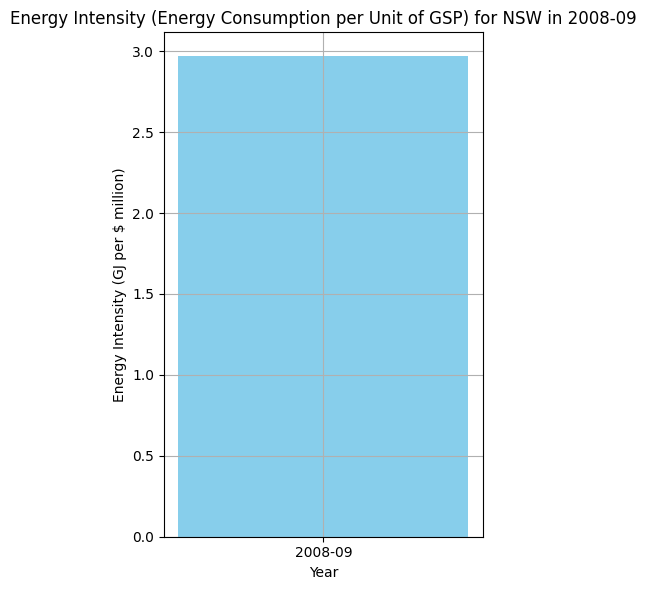

In [ ]:
# @title Write a function to plot a Graph for visualization
state = "NSW" # @param ["WA", "NSW", "VIC", "TAS", "QLD", "SA", "NT", "All state "]
year = "2008-09" # @param ["2008-09", "2009-10", "2010-11", "2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20", "2020-21", "2021-22"] {allow-input: true}


if (state in filtered_df['State'].unique()) and (year in filtered_df['Year'].unique()):
    state_year_data = filtered_df[(filtered_df['State'] == state) & (filtered_df['Year'] == year)]

    # Plot energy intensity for the specified state and year
    plt.figure(figsize=(4, 6))
    plt.bar(state_year_data['Year'], state_year_data['Energy_Intensity'], color='skyblue')
    plt.title(f'Energy Intensity (Energy Consumption per Unit of GSP) for {state} in {year}')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (GJ per $ million)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    # Plot energy intensity for all states annually
    plt.figure(figsize=(12, 8))
    for state in filtered_df['State'].unique():
        state_data = filtered_df[filtered_df['State'] == state]
        plt.plot(state_data['Year'], state_data['Energy_Intensity'], marker='o', label=state)

    plt.title('Energy Intensity (Energy Consumption per Unit of GSP) for Each State Annually')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (GJ per $ million)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [104]:
# Close the connection
conn.close()

## **Reflections**

1.   To construct the algorithm i looked at the tutorial lab    lectures. When tackling the problem, I sought guidance from ChatGPT to gain insights. ChatGPT provided valuable insights into breaking down the problem into manageable steps. Additionally, I explored various algorithms and coding techniques in Python to implement the solution efficiently. ChatGPT assisted in clarifying coding concepts, suggesting Python libraries and functions such as Pragma table info, suitable for data manipulation and analysis tasks. By the combined expertise of ChatGPT, lectures and my own problem-solving skills, I was able to approach the problem with confidence, applying a blend of manual reasoning and coding techniques to deliver a insightful solution.

2. While developing the code, other than refer to the code we learnt in our lesson, I did refer to other sources as well. Here, I discovered that I am an audio learner rather than visual learner. The reason being, I find it is very time consuming for me to peruse word paragraph. In contrast, I reckon that it is more effective for me to learn by watching video and follow the step-by-step instructions in tutorials. Also, I am very grateful to Rohini and Sisi for the guidance and professional teaching throughout this semester, which has enabled me to gain my coding skills as a beginner. Besides that, all of our group members have casual jobs. Therefore, we acknowledged that there is an issue with finding a time to get everyone to meet together in person. To encounter this, one of our team member took a day off from work so we can meet togther in library together. It is very productive to get everyone sit down face-to-face together.


3. We had a problem working with Google Colab during our recent assignment on the business report. We were stuck with a specific aspect of the form part of our project instead of focusing on the teacher's explanations in class.  and I choose the dropdown option for 2 selections. The choice option feature needed to be implemented, which would have required the inclusion of if-else statements in our code. I decided to consult ChatGPT for assistance, uncertain how we could proceed. It turned out that reaching out to ChatGPT was invaluable. The AI provided clear and detailed coding solutions that fully addressed our problem.
When I tried to generate a new column by combining the energy sources in my DataFrame, it gave me an alert. The problem was that I was working with a copy of a part of the original data frame, which can cause issues. To fix it, I asked Chatgpt then I got idea about .loc so, I've chosen. loc for a direct location of the new column to be inserted. This resolved the problem, avoiding any errors.



